In [1]:
%matplotlib inline

from collections import OrderedDict

import numpy as np
import pandas as pd
import xarray as xr

from string import ascii_uppercase

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from IPython.display import display

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.2,)
plt.rcParams.update({'mathtext.default':  'regular' })

colors = dict(zip(['D2009', '$RVIC_{FAST}$', '$RASM_{CONTROL}$'], ["#95a5a6", "#e74c3c", "#34495e"]))

beg = '1990-01'
end = '1999-12'

In [2]:
dsets = OrderedDict()

dsets['obs'] = xr.open_dataset('/raid2/jhamman/projects/RASM/data/compare/dai_trenberth_river/coastal-stns-Vol-monthly.updated-oct2007.nc', decode_times=False).load()

dsets['control'] = xr.open_dataset('/home/jhamman/workdir/R1010RBRbaaa01a_dai_b/hist/R1010RBRbaaa01a_dai_b.rvic.h0i.2010-01-02-00-00-00.nc')
dsets['fast'] = xr.open_dataset('/home/jhamman/workdir/R1010RBRbaaa01a_dai_a/hist/R1010RBRbaaa01a_dai_a.rvic.h0i.2010-01-02-00-00-00.nc')

obs_lookup = pd.read_table('/raid2/jhamman/projects/RASM/data/compare/dai_trenberth_river/coastal-stns-byVol-updated-oct2007_clean.txt')
obs_lookup.index = obs_lookup['River_Name']
obs_lookup = obs_lookup['No']

In [3]:
# Reformat the Simulated hydrographs
dframes = OrderedDict()
for sim in ['control', 'fast']:
    dsets[sim].outlets.values = dsets[sim].outlet_name.values
    
    dframes[sim] = dsets[sim].streamflow.to_dataframe().unstack()['streamflow']
    dframes[sim].index = pd.date_range('1979-09-01', freq='D', periods=len(dframes[sim]))
    dframes[sim] = dframes[sim].resample('MS').mean()
    dframes[sim].columns = [c.decode() for c in dframes[sim].columns]
    
#     dframes[sim].drop(['Pechora_at_Oksino_Rus'], axis=1, inplace=True)  # values are all near zero
    
dframes[sim].head()

,Alazeya_at_Andrushkino,Albany_at_nr_Hat_Isla,Alsek_at_nr_Yakutat,Amur_at_Komsomolsk,Anabar_at_Saskylakh,Anderson_at_ds_Carnwat,Attawapiskat_at_ds_Attawap,Back_at_us_Hermann,Baleine_R__la_at_pres_de_le,Bruara_at_Efstidalur,...,Tay_at_Ballathie,Taz_at_Sidorovsk,Tree_at_nr_mouth,Umba_at_Payalka,Varzuga_at_Varzuga,Voroniya_at_Serebryansk,Winisk_at_ds_Ashewei,Yana_at_Ubileynaya,Yenisey_at_Igarka_Rus,Yukon_at_Pilot_Stn
1979-09-01,6.003209,815.608157,1366.782331,9113.793752,9.836387e-05,38.469032,25.202263,169.006908,109.408800,154.185276,...,24.487409,347.689970,5.150462,30.695207,9.034228e-04,29.506189,509.418411,158.664805,4107.031864,1998.282724
1979-10-01,0.004568,528.745513,1413.026616,4769.185978,9.463808e-09,26.713519,11.153118,133.661936,90.368137,167.064889,...,55.540805,223.550540,7.266259,8.885828,3.719468e-04,11.464762,333.336429,51.568296,5761.030224,3183.407042
1979-11-01,0.003553,253.340411,330.831368,2649.160252,1.022503e-08,0.023634,8.083590,1.182565,75.624807,84.824707,...,67.217317,0.134277,0.006040,0.007542,1.841900e-07,0.006763,100.040729,0.133557,3685.259391,1034.357109
1979-12-01,0.004549,2.457841,7.230544,1932.284288,1.107160e-08,0.011398,0.003626,0.127390,0.006401,99.812391,...,72.117197,0.134326,0.006873,0.007542,1.841900e-07,0.006763,0.359405,0.143199,118.849282,341.705070
1980-01-01,0.005357,2.434598,0.847128,1245.093003,1.199442e-08,0.013367,0.003626,0.127552,0.006100,107.861693,...,62.407949,0.134326,0.007320,0.007542,1.841900e-07,0.006763,0.368650,0.150095,19.333408,15.250750


In [4]:
def get_rvic_river_name(outlet_name):
    return outlet_name.split('_')[0]

In [5]:
names = []
cols = []
for c in dframes[sim].columns:
    river = get_rvic_river_name(c)
    try:
        cols.append(obs_lookup.ix[river] - 1)
        names.append(c)
    except:
        print('failed for %s' % river)

failed for Baleine
failed for Feuilles
failed for Fish
failed for Melezes
failed for Severnaya
failed for Shuchya


In [6]:
# Reformat the Observed hydrographs
dsets['obs']['time'] = pd.date_range(start='1900-01-01', end='2006-12-31', freq='MS')
dsets['obs'] = dsets['obs'].isel(station=cols)
dsets['obs'].station.values = names
dframes['obs'] = dsets['obs'].FLOW.to_dataframe().unstack()['FLOW']
dframes['obs'].head()

station,Alazeya_at_Andrushkino,Albany_at_nr_Hat_Isla,Alsek_at_nr_Yakutat,Amur_at_Komsomolsk,Anabar_at_Saskylakh,Anderson_at_ds_Carnwat,Attawapiskat_at_ds_Attawap,Back_at_us_Hermann,Bruara_at_Efstidalur,Burnside_at_nr_mouth,...,Tay_at_Ballathie,Taz_at_Sidorovsk,Tree_at_nr_mouth,Umba_at_Payalka,Varzuga_at_Varzuga,Voroniya_at_Serebryansk,Winisk_at_ds_Ashewei,Yana_at_Ubileynaya,Yenisey_at_Igarka_Rus,Yukon_at_Pilot_Stn
time,,,,,,,,,,,,,,,,,,,,,
1900-01-01,NaN,NaN,NaN,1459.695068,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-02-01,NaN,NaN,NaN,923.748169,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03-01,NaN,NaN,NaN,828.575989,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-04-01,NaN,NaN,NaN,2086.660645,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-05-01,NaN,NaN,NaN,14597.450195,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
from matplotlib import gridspec
sns.set_style('whitegrid')

def plot_river_timeseries(rivers, scale=1000., beg='1990-01', end='1999-12', figsize=(10, 12)):

    if not scale:
        scale = 1
    j = 0
    
    fig = plt.figure(figsize=figsize) 
    gs = gridspec.GridSpec(len(rivers), 2, width_ratios=[3, 1]) 

    bot_ax1 = plt.subplot(gs[-1, 0])
    bot_ax2 = plt.subplot(gs[-1, 1])

    for i, river in enumerate(rivers):

        data = OrderedDict()
        data['$RVIC_{FAST}$'] = dframes['fast'][river]
        data['$RASM_{CONTROL}$'] = dframes['control'][river]
        data['D2009'] = dframes['obs'][river]
        
        df = pd.DataFrame(data)[beg:end]
        # time series
        ax1 = plt.subplot(gs[i, 0], sharex=bot_ax1)
        for k, s in df.items():
            (s / scale).plot(ax=ax1, legend=False, color=colors[k], label=k)
        riv = river.split('_')[0]
        if scale != 1:
            ax1.set_ylabel('Q $({:,}\ m^3/s)$'.format(int(scale)))
        else:
            ax1.set_ylabel('%s\nQ $(m^3/s)$' % riv)
        ax1.set_title('%s River' % riv)
            
        ax1.text(0.02, 0.95,
            "%s.1" % (ascii_uppercase[i]),
            transform=ax1.transAxes,
            fontsize=12, fontweight='semibold', va='top', ha='left', zorder=100,
            bbox=dict(boxstyle='square', facecolor='white', alpha=1, lw=0))
            
        # annual cycle
        ax2 = plt.subplot(gs[i, 1], sharey=ax1, sharex=bot_ax2)
        df_drop = df.dropna()
        for k, s in df_drop.items():
            s_group = (s / scale).groupby(lambda x: x.month) 
            m = s_group.mean()
            std = s_group.std()

            m.plot(ax=ax2, color=colors[k], label=k)
            ax2.fill_between(m.index, m + std/2, m - std/2, color=colors[k], alpha=0.5)
        if i == 0:
            ax1.legend(loc='upper center', ncol=3, frameon=True)
        ax2.text(0.04, 0.95,
            "%s.2" % (ascii_uppercase[i]),
            transform=ax2.transAxes,
            fontsize=12, fontweight='semibold', va='top', ha='left', zorder=100,
            bbox=dict(boxstyle='square', facecolor='white', alpha=1, lw=0))
        
        ax2.set_xticks(range(1, 13))
        ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

    gs.tight_layout(fig, pad=1.01)
        
    return fig, gs

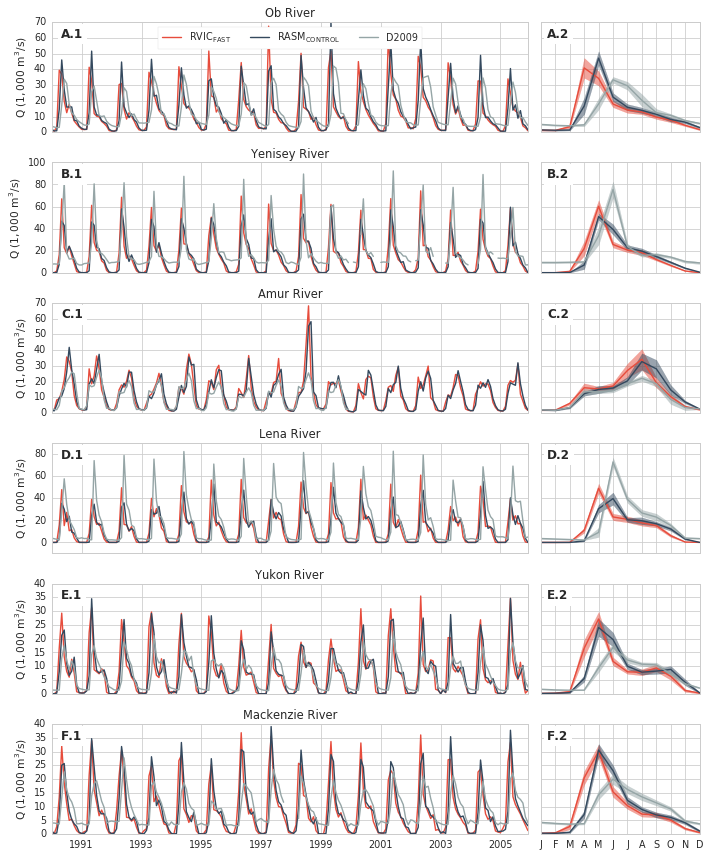

In [8]:
rivers = ['Ob_at_Salekhard', 'Yenisey_at_Igarka_Rus', 'Amur_at_Komsomolsk',
          'Lena_at_Kusur_Russ', 'Yukon_at_Pilot_Stn', 'Mackenzie_at_Arctic_Red']

fig, gs = plot_river_timeseries(rivers, end='2005')

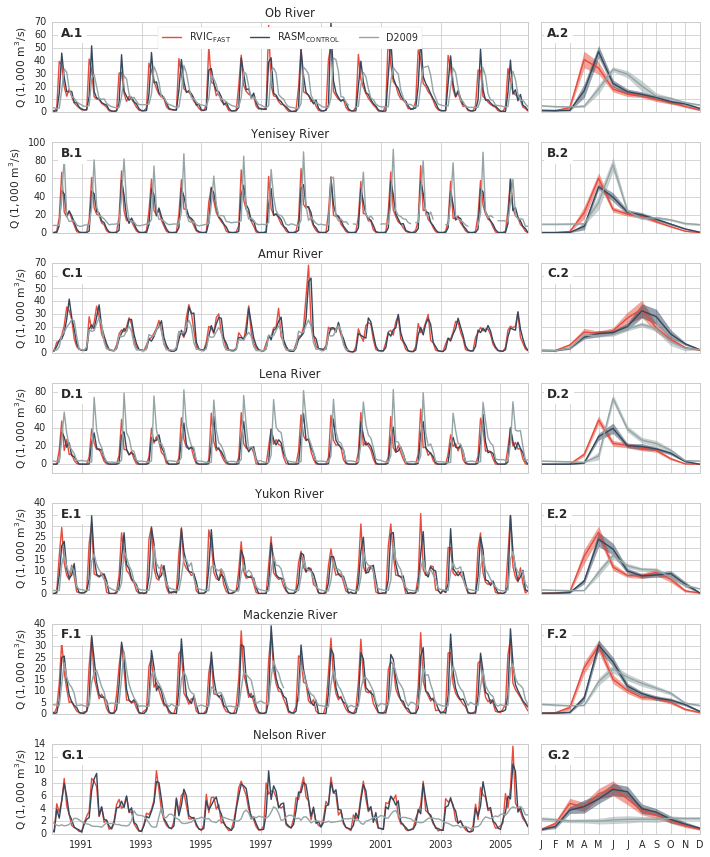

In [9]:
rivers = ['Ob_at_Salekhard', 'Yenisey_at_Igarka_Rus', 'Amur_at_Komsomolsk',
          'Lena_at_Kusur_Russ', 'Yukon_at_Pilot_Stn', 'Mackenzie_at_Arctic_Red', 'Nelson_at_us_Bladder']
fig, gs = plot_river_timeseries(rivers, end='2005')

fig.savefig('../figs/R1010RBRbaaa01a_rvicfast_hydrographs.png', dpi=300, bbox_inches='tight')

# Eval Measures

1.  Overlap Statistic
2.  Ratio of standard deviations
3.  Correlation coefficient
4.  Bias
5. Nash-Sutcliffe model efficiency
6. Kling-Gupta
7. peak flow month
8. 50% annual flow month

In [10]:
from statsmodels.tools.eval_measures import bias
# Eval measures

# 1.  Overlap statistic
def hydrograph_overlap(mod, obs, by='month', return_data=False):
    '''
    Calculate the overlap statistic from [Perkins et al., 2007]
    (http://dx.doi.org/10.1175/Jcli4253.1)
       
    Parameters
    ----------
    obs, mod : Pandas.Series
        Series to calculate the overlap statistic on
    by : str, function, or Pandas.Grouper
        groupby directive
    return_data : bool (default=False)
        If True, return the normalized hydrographs in addition to the overlap statistic.
        
    Returns
    -------
    overlap : float
        Overlap statistic calculated from `obs` and `mod`
    '''
    
    # groupby functions
    if by == 'month':
        by = lambda x: x.month
    elif by == 'yday':
        by = lambda x: x.timetuple().tm_yday
    
    # align the series and create a pandas.DataFrame
    obs, mod = obs.align(mod, join='outer')
    df = pd.DataFrame({'obs': obs, 'mod': mod}, copy=True)
    
    # Drop any missing values
    df.dropna(axis=0, how='any', inplace=True)
    
    # Groupby "by"
    groups = df.groupby(by=by).mean()
    
    # normalize the mean grouped hydrographs
    groups /= groups.sum()
    
    # Return the overlap statistic
    overlap_stat = np.minimum(groups['obs'], groups['mod']).sum()
    
    if return_data:
        return overlap_stat, groups
    return overlap_stat


# 2.  Ratio of standard deviations
def std_ratio(mod, obs):
    std_obs = obs.std()
    std_mod = mod.std()
    
    return std_mod / std_obs
    

# 3.  Correlation coefficient
def calc_correlation_coef(mod, obs):
    return obs.corr(mod)


# 4.  Percent bias
def percent_bias(mod, obs):
    return 100. * (sum(mod - obs) / sum(obs))


# 5.  Nash-Sutcliff
def nash_sutcliff(mod, obs, axis=0, varient='standard', j=1):
    """Nash–Sutcliffe model efficiency coefficient (NSE)

    Parameters
    ----------
    mod : array_like
        Model estimates.
    obs : array_like
        Observations.
    axis : int
       axis along which the summary statistic is calculated
    varient : str
        Varient of the Nash-Sutcliffe model to use. Valid options are
        {'standard', 'modified', 'relative'}. Default is 'standard'. The
        standard option is equivalent to calculating the `rsquared` value.
    j : int
        The exponent to be used in the computation of the modified varient
        Nash-Sutcliffe effciency. The default value is j=1.

    Returns
    -------
    nse : ndarray or float
       Nash–Sutcliffe model efficiency coefficient along given axis.

    Notes
    -----
    If ``mod`` and ``obs`` have different shapes, then they need to broadcast.
    This uses ``numpy.asanyarray`` to convert the input. Whether this is the
    desired result or not depends on the array subclass, for example
    numpy matrices will silently produce an incorrect result.

    References
    ----------
    Krause, P., Boyle, D. P., and Bäse, F.: Comparison of different efficiency
    criteria for hydrological model assessment, Adv. Geosci., 5, 89-97, 2005.

    Legates and McCabe, 1999. Evaluating the use of "goodness-of-fit" measures
    in hydrologic and hydroclimatic model validation. Water Resources Research.
    v35 i1. 233-241.

    http://en.wikipedia.org/wiki/Nash%E2%80%93Sutcliffe_model_efficiency_coefficient
    """
    mod = np.asanyarray(mod)
    obs = np.asanyarray(obs)

    # Mean values
    mean_obs = np.mean(obs, axis=axis)

    if varient.lower() in ('standard'):
        n = ((obs - mod) ** 2).sum(axis=axis)
        d = ((obs - mean_obs) ** 2).sum(axis=axis)
    elif varient.lower() == 'modified':
        if j <= 0:
            raise ValueError('Invalid value for j, must greater than zero')
        n = (np.abs(obs - mod) ** j).sum(axis=axis)
        d = (np.abs(obs - mean_obs) ** j).sum(axis=axis)
    elif varient.lower() == 'relative':
        n = (((obs - mod) / obs) ** 2).sum(axis=axis)
        d = (((obs - mean_obs) / mean_obs) ** 2).sum(axis=axis)
    else:
        raise ValueError('Unknown value for varient: %s' % varient)

    return 1 - (n / d)


# 6. Kling-Gupta
def kling_gupta(mod, obs, axis=0, s=(1., 1., 1.), method='2009'):
    """Kling-Gupta model efficiency coefficient (NSE)

    Parameters
    ----------
    mod : array_like
        Model estimates.
    obs : array_like
        Observations.
    axis : int
        axis along which the summary statistic is calculated
    s : tuple of 3 ints
        Scaling factors.
    method : str


    Returns
    -------
    kge : ndarray or float
       Kling-Gupta model efficiency coefficient along given axis.

    Notes
    -----
    If ``mod`` and ``obs`` have different shapes, then they need to broadcast.
    This uses ``numpy.asanyarray`` to convert the input. Whether this is the
    desired result or not depends on the array subclass, for example
    numpy matrices will silently produce an incorrect result.

    References
    ----------
    Hoshin V. Gupta, Harald Kling, Koray K. Yilmaz, Guillermo F. Martinez,
    Decomposition of the mean squared error and NSE performance criteria:
    Implications for improving hydrological modelling, Journal of Hydrology,
    Volume 377, Issues 1-2, 20 October 2009, Pages 80-91,
    DOI: 10.1016/j.jhydrol.2009.08.003. ISSN 0022-1694.

    Kling, H., M. Fuchs, and M. Paulin (2012), Runoff conditions in the
    upper Danube basin under an ensemble of climate change scenarios,
    Journal of Hydrology, Volumes 424-425, 6 March 2012, Pages 264-277,
    DOI:10.1016/j.jhydrol.2012.01.011.
    """
    mod = np.asanyarray(mod)
    obs = np.asanyarray(obs)

    # Mean values
    mean_mod = np.mean(mod, axis=axis)
    mean_obs = np.mean(obs, axis=axis)

    # Standard deviations
    sigma_mod = np.std(mod, axis=axis)
    sigma_obs = np.std(obs, axis=axis)

    # Pearson product-moment correlation coefficient
    r = np.corrcoef(mod, obs)[0, 1]  # needs to support axis!

    # alpha is a measure of relative variability between modeled and observed
    # values (See Ref1)
    alpha = sigma_mod / sigma_obs

    # beta is the ratio between the mean of the simulated values to the mean of
    # observations
    beta = mean_mod / mean_obs

    # cv_mod is the coefficient of variation of the simulated values
    # [dimensionless]
    # cv_obs is the coefficient of variation of the observations
    # [dimensionless]
    cv_mod = sigma_mod / mean_mod
    cv_obs = sigma_obs / mean_obs

    # gamma is the variability ratio, which is used instead of alpha (See Ref2)
    gamma = cv_mod / cv_obs

    # Variability ratio depending on 'method'
    if method == '2012':
        vr = gamma
    elif method == '2009':
        vr = alpha
    else:
        raise ValueError('Unknown method %s' % method)

    # KGE Computation
    kge = 1 - np.sqrt((s[0] * (r - 1)) ** 2
                      + (s[1] * (vr - 1)) ** 2
                      + (s[2] * (beta - 1)) ** 2)
    return kge


# 7. peak flow month bias
def calc_peak_flow_month_bias(mod, obs):
    return float(mod.groupby(lambda x: x.month).mean().idxmax() - obs.groupby(lambda x: x.month).mean().idxmax())


# 8. 50% annual flow month bias
def calc_50pct_flow_month_bias(mod, obs):
    cum_mod = mod.groupby(lambda x: x.month).mean().cumsum()
    cum_obs = obs.groupby(lambda x: x.month).mean().cumsum()
    return int(((cum_mod / cum_mod.ix[12]) > 0.5).idxmax() - ((cum_obs / cum_obs.ix[12]) > 0.5).idxmax())

def obs_mean_annual(mod, obs):
    return obs.groupby(lambda x: x.month).mean().mean()

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [11]:
def calc_river_stats(mod, obs):
    '''
    this function compares two timeseries and returns a pandas.DataFrame containing the following statistics:
        - overlap statistic (annual cycle)
        - ratio of model standard deviation to observed standard deviation
        - Correlation Coefficient
        - Bias
        - Nash-Sutcliffe model efficiency
        - Kling-Gupta
        - peak flow month
        - 50% annual flow month
    '''
    df = pd.DataFrame({'model': mod, 'obs': obs}).dropna()
    
    stats = ['hydrograph_overlap', 'std_ratio', 'calc_correlation_coef', 'percent_bias',
             'nash_sutcliff', 'kling_gupta', 'calc_peak_flow_month_bias',
             'calc_50pct_flow_month_bias', 'obs_mean_annual', 'rmse']
    sdict = OrderedDict()
    for stat in stats:
        func = globals()[stat]
        sdict[stat] = func(df.model, df.obs)
        
    return pd.Series(sdict)

In [12]:
sim_stats = OrderedDict()
for sim, name in zip(['fast', 'control'], ['$RVIC_{FAST}$', '$RASM_{CONTROL}$']):
    sim_stats[name] = OrderedDict()
    for river in dframes['obs'].columns:
        try:
            sim_stats[name][river] = calc_river_stats(dframes[sim][river][beg:end], dframes['obs'][river][beg:end])
        except Exception as e:
            print(river, e)

Khatanga_at_Khatanga_R 12
Khatanga_at_Khatanga_R 12


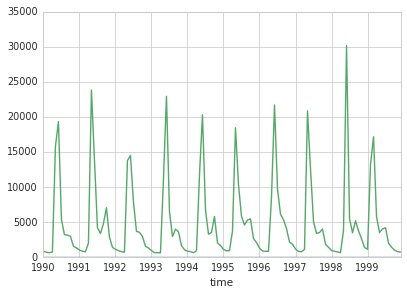

In [13]:
river = 'Pechora_at_Oksino_Rus'
dframes[sim][river][beg:end].plot()
dframes['obs'][river][beg:end].plot()

In [14]:
sim_stats = {key: pd.DataFrame(vals).T for key, vals in sim_stats.items()}

In [15]:
sim_stats[name].head()

,hydrograph_overlap,std_ratio,calc_correlation_coef,percent_bias,nash_sutcliff,kling_gupta,calc_peak_flow_month_bias,calc_50pct_flow_month_bias,obs_mean_annual,rmse
Alazeya_at_Andrushkino,0.452362,0.448463,0.093424,-62.963584,-0.410540,-0.233902,-2.0,-3.0,53.774188,74.261322
Albany_at_nr_Hat_Isla,0.687210,0.535600,0.263404,-45.923786,-0.223886,0.015551,-2.0,-1.0,997.024765,1046.042762
Alsek_at_nr_Yakutat,0.693224,1.340558,0.509347,20.261002,-0.472248,0.369309,-2.0,-1.0,876.797379,1067.539186
Amur_at_Komsomolsk,0.901511,1.453829,0.840382,26.853325,0.200266,0.449047,0.0,1.0,10237.270237,6827.359687
Anabar_at_Saskylakh,0.481081,0.000001,0.262468,-99.999891,-0.294920,-0.594976,-1.0,-1.0,560.290915,1174.037652


In [16]:
sim_stats[name].describe()

,hydrograph_overlap,std_ratio,calc_correlation_coef,percent_bias,nash_sutcliff,kling_gupta,calc_peak_flow_month_bias,calc_50pct_flow_month_bias,obs_mean_annual,rmse
count,67.000000,6.700000e+01,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,0.607902,1.695538e+00,0.300037,-13.603172,-46.678891,-0.825963,-1.537313,-1.134328,1642.978143,1572.022659
std,0.148805,4.575669e+00,0.270450,99.859612,339.390625,4.430541,1.500791,0.814556,3766.953507,3001.389431
min,0.257293,4.396640e-07,-0.160639,-99.999967,-2771.298572,-34.152488,-10.000000,-3.000000,8.486111,15.435738
25%,0.515617,3.933764e-01,0.070882,-68.055173,-1.847085,-0.608713,-2.000000,-2.000000,86.766256,130.455659
50%,0.622344,9.654753e-01,0.285643,-24.253457,-0.556200,-0.063216,-1.000000,-1.000000,270.481945,385.055813
75%,0.707802,1.447470e+00,0.508114,13.359375,-0.207597,0.337420,-1.000000,-1.000000,1028.940849,1367.011788
max,0.918784,3.603365e+01,0.840382,615.483942,0.576959,0.616223,0.000000,1.000000,19427.133333,13788.232836


In [17]:
# Filter sites that obviously don't match
for key in sim_stats:
    sim_stats[key] = sim_stats[key][(sim_stats[key]['percent_bias'] > -90) & (sim_stats[key]['percent_bias'] < 90.)]

In [18]:
class TaylorDiagram(object):
    """Taylor diagram: plot model standard deviation and correlation
    to reference (data) sample in a single-quadrant polar plot, with
    r=stddev and theta=arccos(correlation).
    """

    def __init__(self, refstd, fig=None, rect=111, label='_', smax_factor=1.75):
        """Set up Taylor diagram axes, i.e. single quadrant polar
        plot, using mpl_toolkits.axisartist.floating_axes. refstd is
        the reference standard deviation to be compared to.
        """

        from matplotlib.projections import PolarAxes
        from mpl_toolkits.axisartist import floating_axes
        from mpl_toolkits.axisartist import grid_finder

        self.refstd = refstd  # Reference standard deviation

        tr = PolarAxes.PolarTransform()

        # Correlation labels
        rlocs = np.concatenate((np.arange(10) / 10., [0.95, 0.99]))
        tlocs = np.arccos(rlocs)  # Conversion to polar angles
        gl1 = grid_finder.FixedLocator(tlocs)  # Positions
        tf1 = grid_finder.DictFormatter(dict(zip(tlocs, map(str, rlocs))))

        # Standard deviation axis extent
        self.smin = 0
        self.smax = smax_factor * self.refstd

        ghelper = floating_axes.GridHelperCurveLinear(
            tr, extremes=(0, np.pi / 2,  # 1st quadrant
                          self.smin, self.smax),
            grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = plt.figure()

        ax = floating_axes.FloatingSubplot(fig, rect, grid_helper=ghelper)
        fig.add_subplot(ax)

        # Adjust axes
        ax.axis["top"].set_axis_direction("bottom")  # "Angle axis"
        ax.axis["top"].toggle(ticklabels=True, label=True)
        ax.axis["top"].major_ticklabels.set_axis_direction("top")
        ax.axis["top"].label.set_axis_direction("top")
        ax.axis["top"].label.set_text("Correlation")

        ax.axis["left"].set_axis_direction("bottom")  # "X axis"
        ax.axis["left"].label.set_text("Standard deviation")

        ax.axis["right"].set_axis_direction("top")  # "Y axis"
        ax.axis["right"].toggle(ticklabels=True)
        ax.axis["right"].major_ticklabels.set_axis_direction("left")

        ax.axis["bottom"].set_visible(False)  # Useless

        # Contours along standard deviations
        ax.grid(False)

        self._ax = ax  # Graphical axes
        self.ax = ax.get_aux_axes(tr)  # Polar coordinates

        # Add reference point and stddev contour
        l = self.ax.plot([0], self.refstd, 'k*',
                         ls='', ms=10, label=label)
        t = np.linspace(0, np.pi/2)
        r = np.zeros_like(t) + self.refstd
        self.ax.plot(t, r, 'k--', label='_')

        # Collect sample points for latter use (e.g. legend)
        self.sample_points = [l]

    def add_sample(self, stddev, corrcoef, *args, **kwargs):
        """Add sample (stddev,corrcoeff) to the Taylor diagram. args
        and kwargs are directly propagated to the Figure.plot
        command."""

        l = self.ax.scatter(np.arccos(corrcoef), stddev,
                            *args, **kwargs)  # (theta, radius)
        self.sample_points.append(l)

        return l

    def add_contours(self, levels=5, **kwargs):
        """Add constant centered RMS difference contours."""

        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax),
                             np.linspace(0, np.pi / 2))
        # Compute centered RMS difference
        rms = np.sqrt(self.refstd**2 + rs**2 - 2 * self.refstd*rs*np.cos(ts))

        contours = self.ax.contour(ts, rs, rms, levels, **kwargs)

        return contours

In [19]:
sim_stats[name].shape

(51, 10)

51 rivers included


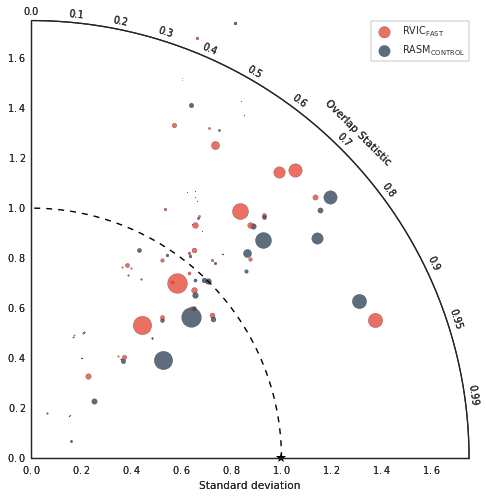

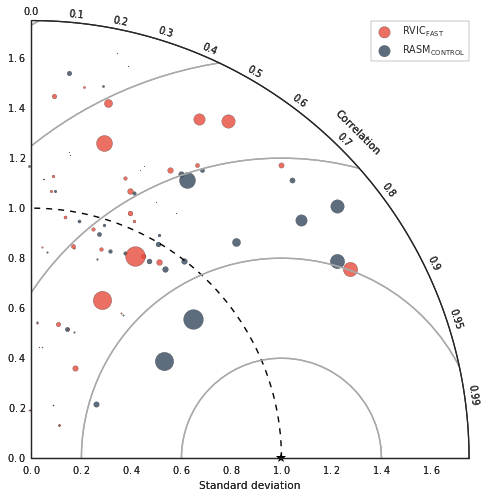

In [20]:
sns.set_style('white')

fig = plt.figure(figsize=(8, 8))
taylor = TaylorDiagram(1., fig=fig)
hdict = OrderedDict()
for sim, name in zip(['fast', 'control'], ['$RVIC_{FAST}$', '$RASM_{CONTROL}$']):
    for river in sim_stats[name].index:
        hdict[name] = taylor.add_sample(sim_stats[name].ix[river]['std_ratio'], sim_stats[name].ix[river]['hydrograph_overlap'],
                                       s=sim_stats[name].ix[river]['obs_mean_annual'] / 50, c=colors[name], alpha=0.8)
taylor._ax.axis["top"].label.set_text("Overlap Statistic")
plt.legend(hdict.values(), hdict.keys(), frameon=True)
    

fig = plt.figure(figsize=(8, 8))
taylor = TaylorDiagram(1., fig=fig)
for sim, name in zip(['fast', 'control'], ['$RVIC_{FAST}$', '$RASM_{CONTROL}$']):
    for river in sim_stats[name].index:
        hdict[name] = taylor.add_sample(sim_stats[name].ix[river]['std_ratio'], sim_stats[name].ix[river]['calc_correlation_coef'],
                                        s=sim_stats[name].ix[river]['obs_mean_annual'] / 50, c=colors[name], alpha=0.8)
    taylor.add_contours(colors='darkgrey')
plt.legend(hdict.values(), hdict.keys(), frameon=True)
fig.savefig('../figs/R1010RBRbaaa01a_rvicfast_taylordiag.png', dpi=300, bbox_inches='tight')

print(len(sim_stats[name].index), 'rivers included')

In [21]:
sim_stats[name].ix[river]['obs_mean_annual'] / 50

129.56809269205732

51 rivers included


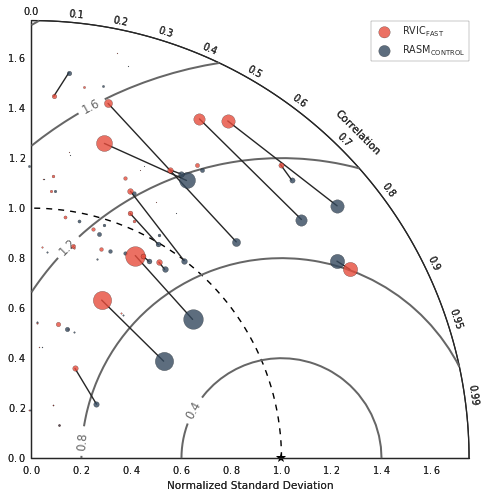

In [22]:
fig = plt.figure(figsize=(8, 8))
taylor = TaylorDiagram(1., fig=fig)
for river in sim_stats[name].index:
    corrs = []
    stds = []
    for sim, name in zip(['fast', 'control'], ['$RVIC_{FAST}$', '$RASM_{CONTROL}$']):
        hdict[name] = taylor.add_sample(sim_stats[name].ix[river]['std_ratio'], sim_stats[name].ix[river]['calc_correlation_coef'],
                                        s=sim_stats[name].ix[river]['obs_mean_annual'] / 50, c=colors[name], alpha=0.8, zorder=10)
        
        corrs.append(sim_stats[name].ix[river]['calc_correlation_coef'])
        stds.append(sim_stats[name].ix[river]['std_ratio'])
      
    ax = plt.gca()
    
    if sim_stats[name].ix[river]['obs_mean_annual'] > 1000:
        taylor.ax.plot(np.arccos(corrs), stds, c='0.15', zorder=9)
    
c = taylor.add_contours(colors='0.4', linewidths=2, zorder=8)
plt.clabel(c, c.levels, fmt='%.1f', zorder=11)

ax.axis["left"].label.set_text("Normalized Standard Deviation")
    
plt.legend(hdict.values(), hdict.keys(), frameon=True)
fig.savefig('../figs/R1010RBRbaaa01a_rvicfast_taylordiag.png', dpi=300, bbox_inches='tight')

print(len(sim_stats[name].index), 'rivers included')

In [23]:
for sim in ['$RVIC_{FAST}$', '$RASM_{CONTROL}$']:
    sim_stats[sim]['River'] = [river.split('_')[0] for river in sim_stats[sim].index]
    print(sim)
    display(sim_stats[sim].describe())

$RVIC_{FAST}$


,hydrograph_overlap,std_ratio,calc_correlation_coef,percent_bias,nash_sutcliff,kling_gupta,calc_peak_flow_month_bias,calc_50pct_flow_month_bias,obs_mean_annual,rmse
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.585916,1.241013,0.259932,-12.207181,-1.761448,-0.052796,-1.647059,-1.254902,1995.593025,2305.132432
std,0.138917,0.748424,0.226953,36.092581,3.091884,0.494438,1.533930,0.820808,4215.546307,4600.703947
min,0.325029,0.172308,-0.167580,-83.175726,-18.350625,-1.923355,-10.000000,-3.000000,9.941233,35.426059
25%,0.489964,0.852574,0.071919,-33.913089,-1.900573,-0.228717,-2.000000,-2.000000,96.402431,131.671266
50%,0.610064,1.131152,0.271849,-16.213944,-0.634594,0.043413,-1.000000,-1.000000,431.881290,545.885794
75%,0.677033,1.490480,0.435493,13.830710,-0.303978,0.296199,-1.000000,-1.000000,1319.001170,1676.288002
max,0.927643,3.661329,0.860201,64.106089,0.227245,0.537636,0.000000,1.000000,19427.133333,20732.742046


$RASM_{CONTROL}$


,hydrograph_overlap,std_ratio,calc_correlation_coef,percent_bias,nash_sutcliff,kling_gupta,calc_peak_flow_month_bias,calc_50pct_flow_month_bias,obs_mean_annual,rmse
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.622046,1.222562,0.346182,-12.201237,-1.537905,0.016067,-1.450980,-1.078431,1995.593025,1802.682284
std,0.144089,0.746905,0.272621,36.113190,3.065744,0.526172,1.473957,0.868174,4215.546307,3259.077827
min,0.326006,0.170654,-0.160639,-83.181599,-17.816009,-1.893553,-10.000000,-3.000000,9.941233,35.472361
25%,0.524684,0.833281,0.095139,-34.086556,-1.776052,-0.228283,-2.000000,-2.000000,96.402431,132.023145
50%,0.671861,1.071934,0.354839,-16.115570,-0.421699,0.116301,-1.000000,-1.000000,431.881290,478.969366
75%,0.717594,1.483966,0.525340,13.801491,-0.081482,0.375040,-1.000000,-1.000000,1319.001170,1624.563275
max,0.918784,3.608614,0.840382,64.039168,0.576959,0.616223,0.000000,1.000000,19427.133333,13788.232836


In [24]:
for sim in ['$RVIC_{FAST}$', '$RASM_{CONTROL}$']:
    sim_stats[sim]['sim'] = sim
    
sim_stats_tidy = pd.concat(sim_stats.values())

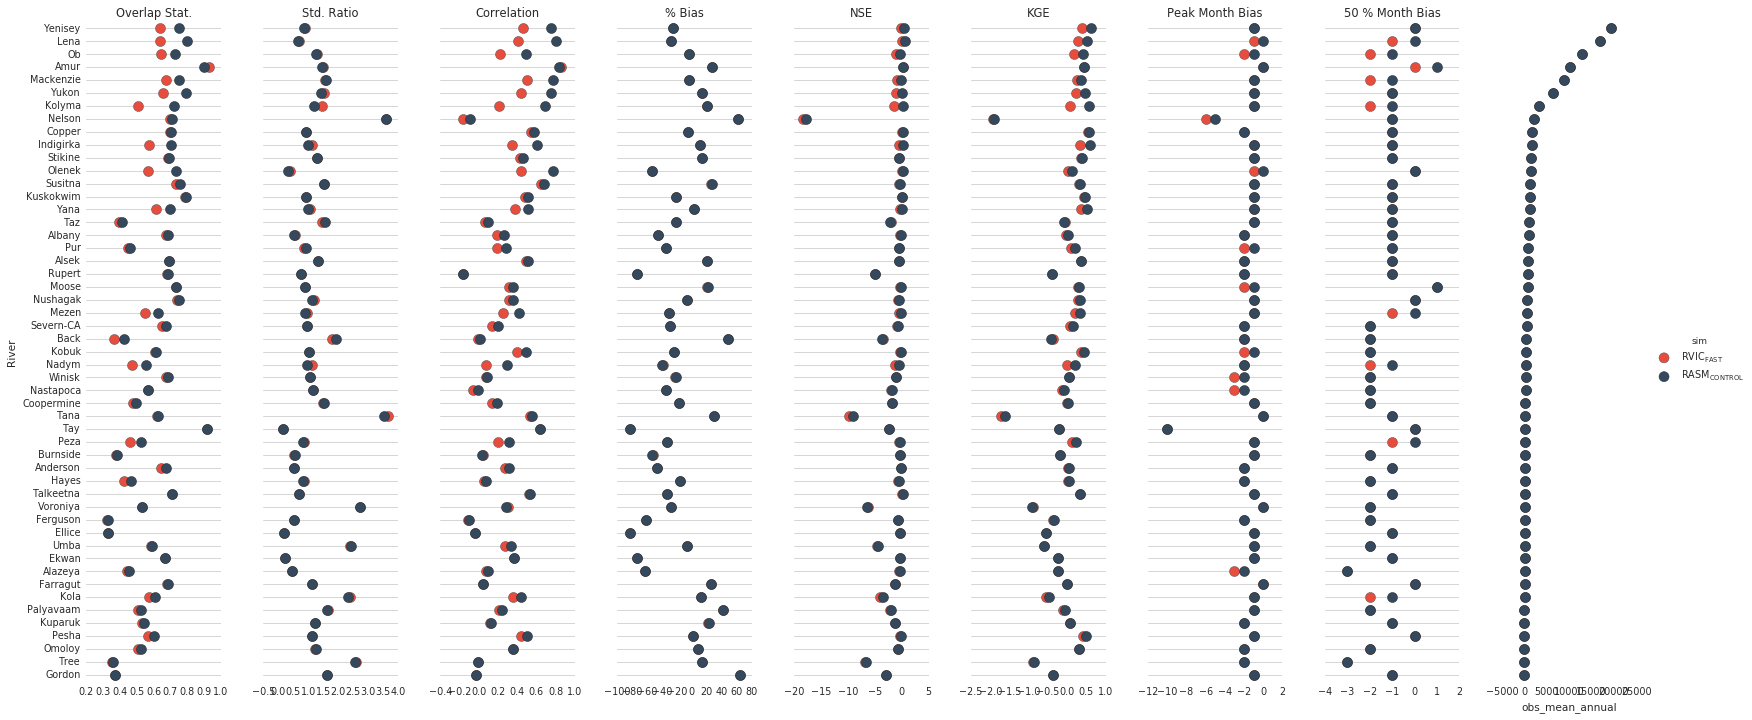

In [25]:
# Make the PairGrid
g = sns.PairGrid(sim_stats_tidy.sort_values('obs_mean_annual', ascending=False),
                 x_vars=sim_stats[sim].columns[:-3],
                 y_vars=['River'],
                 hue='sim', hue_order=['$RVIC_{FAST}$', '$RASM_{CONTROL}$'], palette=colors,
                 size=10, aspect=.25)

# Draw a dot plot using the stripplot function
g = g.map(sns.stripplot, size=10, orient="h",
          linewidth=0.5)
g.add_legend()

# Use semantically meaningful titles for the columns
titles = ["Overlap Stat.", "Std. Ratio", "Correlation",
          "% Bias", "NSE", "KGE", "Peak Month Bias",
          "50 % Month Bias"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title, xlabel='')

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

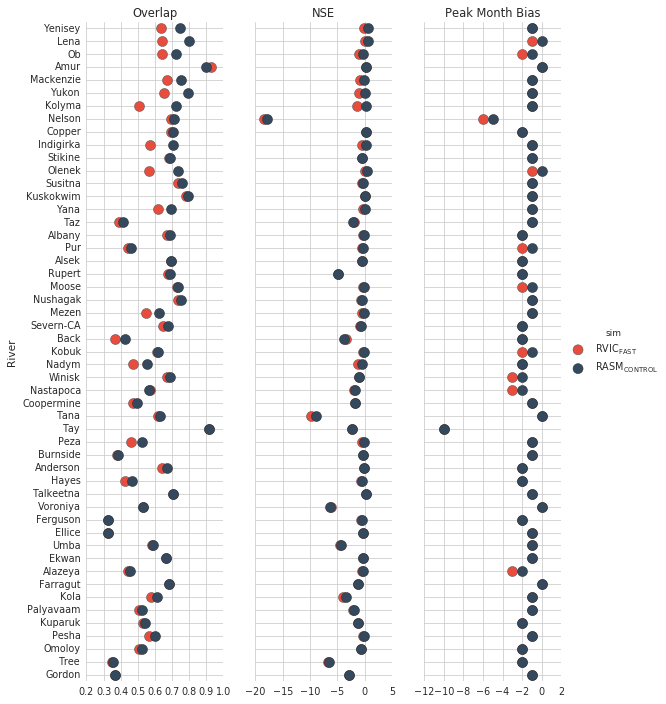

In [26]:
# Make the PairGrid
sns.set_style('white')
g = sns.PairGrid(sim_stats_tidy.sort_values('obs_mean_annual', ascending=False),
                 x_vars=['hydrograph_overlap', 'nash_sutcliff', 'calc_peak_flow_month_bias'],
                 y_vars=['River'],
                 hue='sim', hue_order=['$RVIC_{FAST}$', '$RASM_{CONTROL}$'], palette=colors,
                 size=10, aspect=.25)

# Draw a dot plot using the stripplot function

g = g.map(sns.stripplot, size=10, orient="h",
          linewidth=0.5)
g.add_legend()
# Use semantically meaningful titles for the columns
titles = ["Overlap", "NSE", "Peak Month Bias"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title, xlabel='')

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)

# ax.set_xlim(-1, 4)
    
sns.despine(left=True, bottom=True, right=True, )

In [27]:
table = pd.concat({name: sim_stats[name].ix[rivers][['percent_bias', 'hydrograph_overlap', 'rmse']] for name in ['$RVIC_{FAST}$', '$RASM_{CONTROL}$']})

In [28]:
table = pd.DataFrame(data=table).unstack(0).rename(columns={'percent_bias': 'Bias (\%)', 'hydrograph_overlap': 'Overlap (-)', 'rmse': 'RMSE ($m^3/s$)'})

In [29]:
table.index = table.index.str.replace('_', ' ')

table.columns.levels

FrozenList([['Bias (\%)', 'Overlap (-)', 'RMSE ($m^3/s$)'], ['$RASM_{CONTROL}$', '$RVIC_{FAST}$']])

In [30]:
table

Bias (\%)                    Overlap (-)  \
                        $RASM_{CONTROL}$ $RVIC_{FAST}$ $RASM_{CONTROL}$   
Ob at Salekhard                -3.848637     -3.576577         0.726901   
Yenisey at Igarka Rus         -25.750264    -25.812898         0.749104   
Amur at Komsomolsk             26.853325     26.662128         0.901511   
Lena at Kusur Russ            -28.016452    -28.218366         0.801104   
Yukon at Pilot Stn             13.213153     13.345059         0.792598   
Mackenzie at Arctic Red        -3.997768     -3.794049         0.753233   
Nelson at us Bladder           61.245533     61.360831         0.711395   

                                        RMSE ($m^3/s$)                
                        $RVIC_{FAST}$ $RASM_{CONTROL}$ $RVIC_{FAST}$  
Ob at Salekhard              0.645082     12087.037579  14866.245265  
Yenisey at Igarka Rus        0.638176     13788.232836  20114.295186  
Amur at Komsomolsk           0.927643      6827.359687   6711.211868  
Lena at Kusur Russ           0.640001     13711.199104  20732.742046  
Yukon at Pilot Stn           0.655247      5088.454505   7359.830487  
Mackenzie at Arctic Red      0.674261      6221.609263   8215.213706  
Nelson at us Bladder         0.696906      2878.105509   2918.706722

In [31]:
print(table.to_latex(float_format='%.2f', escape=False))

\begin{tabular}{lrrrrrr}
\toprule
{} &        Bias (\%) &               &      Overlap (-) &               &   RMSE ($m^3/s$) &               \\
{} & $RASM_{CONTROL}$ & $RVIC_{FAST}$ & $RASM_{CONTROL}$ & $RVIC_{FAST}$ & $RASM_{CONTROL}$ & $RVIC_{FAST}$ \\
\midrule
Ob at Salekhard         &            -3.85 &         -3.58 &             0.73 &          0.65 &         12087.04 &      14866.25 \\
Yenisey at Igarka Rus   &           -25.75 &        -25.81 &             0.75 &          0.64 &         13788.23 &      20114.30 \\
Amur at Komsomolsk      &            26.85 &         26.66 &             0.90 &          0.93 &          6827.36 &       6711.21 \\
Lena at Kusur Russ      &           -28.02 &        -28.22 &             0.80 &          0.64 &         13711.20 &      20732.74 \\
Yukon at Pilot Stn      &            13.21 &         13.35 &             0.79 &          0.66 &          5088.45 &       7359.83 \\
Mackenzie at Arctic Red &            -4.00 &         -3.79 &             0.